# Business Cases for Data Science
## Business Case 1 - Customer Segmentation
### Group AA
**Members**:
- Emil Ahmadov (m20201004@novaims.unl.pt)
- Doris Macean (m20200609@novaims.unl.pt)
- Doyun Shin (m20200565@novaims.unl.pt)
- Anastasiia Tagiltseva (m20200041@novaims.unl.pt)

<a class="anchor" id="0.1"></a>

# **Table of Contents**

1. [Business Understanding](#1)

2. [Data Understanding](#2)
  
3. [Data Preparation](#3)
   
4. [Modeling](#4)
   - 4.1 [Recency, Frequency, Monetary Model](#4.1)
   - 4.2 [Clustering by Perspectives](#4.2)
   
5. [Evaluation](#5)
 
6. [Deployment](#6)

# **1. Business Understanding** <a class="anchor" id="1"></a>

The research client - **Wonderful Wines of the World (WWW)** is a 7-year-old enterprise. WWW sell wines through catalogs (telephone), a web site, and ten small stores in major cities around the USA. Several hundred selections are available in each new catalog, sent every 6 weeks.\
Our client wishes to start differentiating customers, and developing more focused marketing programs and **achieve these goals**:\
• understand current customers to identify groups of customers with a shared patterns/characteristics;\
• understand the differences between the different segments to make strategic choices in various campaigns;\
• gain an insight into the behaviour of their customers and to capitalise on improved customer relations.

The group was given a data set of a dataset containing 10,000 customers from our database that have made a purchase in the past 18 months to create a Customer Segmentation model.


#### Project Plan
| Phase | Time | Resources | Risks |
| :--: | :--------: |:--: | :--------: |
| Business Understanding | 1 day | All analysts | Economic and market changes |
| Data Understanding | 1 day | All analysts | Data problems, technological problems |
| Data Preparation | 2 days | Data scientists, DB engineers | Data problems, technological problems |
| Modeling |1 day | Data scientists | Technological problems, inability to build adequate model |
| Evaluation | 1 day | All analysts | Economic change inability to implement results |
| Deployment | 1 day | Data scientists, DB engineers, implementation team | Economic change inability to implement results |

# **2. Data Understanding** <a class="anchor" id="2"></a>

### Dataset description

- **CUSTID**: numeric - customer ID number
- **DAYSWUS**: numeric - number of days as a customer
- **AGE**: numeric - customer’s age or imputed age
- **EDUC**: categorical - years of education (may be imputed): 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0,20.0
- **INCOME**: numeric - household income (may be imputed)
- **KIDHOME**: binary - 1=child under 13 lives at home: '1','0'
- **TEENHOME**: binary - 1=child 13-19 years lives at home: '1','0'
- **FREQ**: numeric - number of purchases in past 18 mo.
- **RECENCY**: numeric - number of days since last purchase
- **MONETARY**: numeric - total sales to this person in 18 mo.
- **LTV**: numeric - Lifetime value of the customer
- **PERDEAL**: numeric - % purchases bought on discount
- **DRYRED**: numeric - % of wines that were dry red wines
- **DRYWH**: numeric -% dry white wines
- **SWEETWH**: numeric - % sweet or semi-dry white wines
- **DESSERT**: numeric - % dessert wines (port, sherry, etc.)
- **EXOTIC**: numeric - % very unusual wines
- **WEBPURCH**: numeric - % of purchases made on website
- **WEBVISIT**: categorical - average # visits to website per month: 1-10
- **SMRACK**: binary - 1=bought the small wine rack \\$ 50: '1','0'
- **LGRACK**: binary - 1=bought the large wine rack \\$100: '1','0'
- **HUMID**: binary - 1=bought wine cellar humidifier \\$75: '1','0'
- **SPCORK**: binary - 1=silver-plated cork extractor \\$60: '1','0'
- **BUCKET**: binary - 1=bought silver wine bucket \\$150: '1','0'
- **ACCESS**: categorical - number of accessories (not SPCORK): 0-4
- **COMPLAIN**: binary - 1=made a complaint in last 18 mo.: '1','0'
- **MAILFRND**: binary - 1=appears on a purchased list of “mail friendly” customers: '1','0'
- **EMAILFRD**: binary - 1=appears on a purchased list of “e-mail friendly” customers: '1','0'

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import squarify
import phik
from sklearn.cluster import KMeans, AgglomerativeClustering
import plotly.express as px
from kmodes.kprototypes import KPrototypes
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from collections import Counter
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import shap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read a xlsx file from current directory into DataFrame and save it to a variable called 'data'
data = pd.read_excel(os.path.join(os.getcwd(),'WonderfulWinesoftheWorld.xlsx'))

In [3]:
#check the top of the datframe to ensure it loaded correctly
data.head(5)

Custid  Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
0  5325.0    653.0  55.0  20.0   78473.0      0.0       0.0  20.0     18.0   
1  3956.0   1041.0  75.0  18.0  105087.0      0.0       0.0  36.0     33.0   
2  3681.0    666.0  18.0  12.0   27984.0      1.0       0.0   4.0     56.0   
3  2829.0   1049.0  42.0  16.0   61748.0      1.0       1.0   2.0     46.0   
4  8788.0    837.0  47.0  16.0   65789.0      0.0       1.0   2.0      3.0   

   Monetary  ...  SMRack  LGRack  Humid  Spcork  Bucket  Access  Complain  \
0     826.0  ...       0       0      0       0       0       0         0   
1    1852.0  ...       0       0      0       1       0       0         0   
2      39.0  ...       0       0      0       0       0       0         0   
3      37.0  ...       0       0      0       0       0       0         0   
4      36.0  ...       0       0      0       0       0       0         0   

   Mailfriend  Emailfriend      Rand  
0           0            0  0.240092  
1           0            0  0.435944  
2           0            0  0.350584  
3           1            1  0.594082  
4           0            0  0.782248  

[5 rows x 30 columns]

In [4]:
#Number of missing values in each feature
data.isna().sum().loc[data.isna().sum() > 0].sort_values(ascending=True)

Custid    1
Rand      1
dtype: int64

In [5]:
# drop the raw that is not assigned to a particular customer
data=data.dropna()
# drop random column
data = data.drop(['Rand'], axis=1)
# Set index as citizen ID
data.set_index(['Custid'], inplace = True)

In [6]:
#Check duplicates
print('No duplicates' if not any(data.duplicated()) else 'Duplicates are found')

No duplicates


In [7]:
# binary columns 
bin_dict = {item: data[item].unique() for item in data if (data[item].nunique() == 2) }
# change dtype for binary column
for item in bin_dict:
    data[item] = data[item].astype('int8')

# **3. Data Preparation** <a class="anchor" id="3"></a>

In [8]:
# replace the value in percentage with data in money
data['Dryred'] = (data['Dryred'] / 100) * data['Monetary']
data['Sweetred'] = (data['Sweetred'] / 100) * data['Monetary']
data['Drywh'] = (data['Drywh'] / 100) * data['Monetary']
data['Sweetwh'] = (data['Sweetwh'] / 100) * data['Monetary']
data['Dessert'] = (data['Dessert'] / 100) * data['Monetary']
data['WebPurchase'] = (data['WebPurchase'] / 100) * data['Monetary']

In [9]:
data_graph=pd.DataFrame(data.loc[:, 'Dryred':'Dessert'].sum(), columns=['sum'])
fig = px.pie(data_graph, values='sum', names=data_graph.index, title='Type of wine preferences', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [10]:
print('Conversion rate for the test promotion for the silver-plated cork extractor: ', round(len(data[data['Spcork']==1])/len(data)* 100,2), "%")

Conversion rate for the test promotion for the silver-plated cork extractor:  6.82 %


In [11]:
# change extreme values in 'Recency'
rcn_t = data['Recency'].copy()
rcn_t.loc[rcn_t>100] = 100
data['Recency'] = rcn_t

In [12]:
phik = data.phik_matrix()

interval columns not set, guessing: ['Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome', 'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit', 'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain', 'Mailfriend', 'Emailfriend']


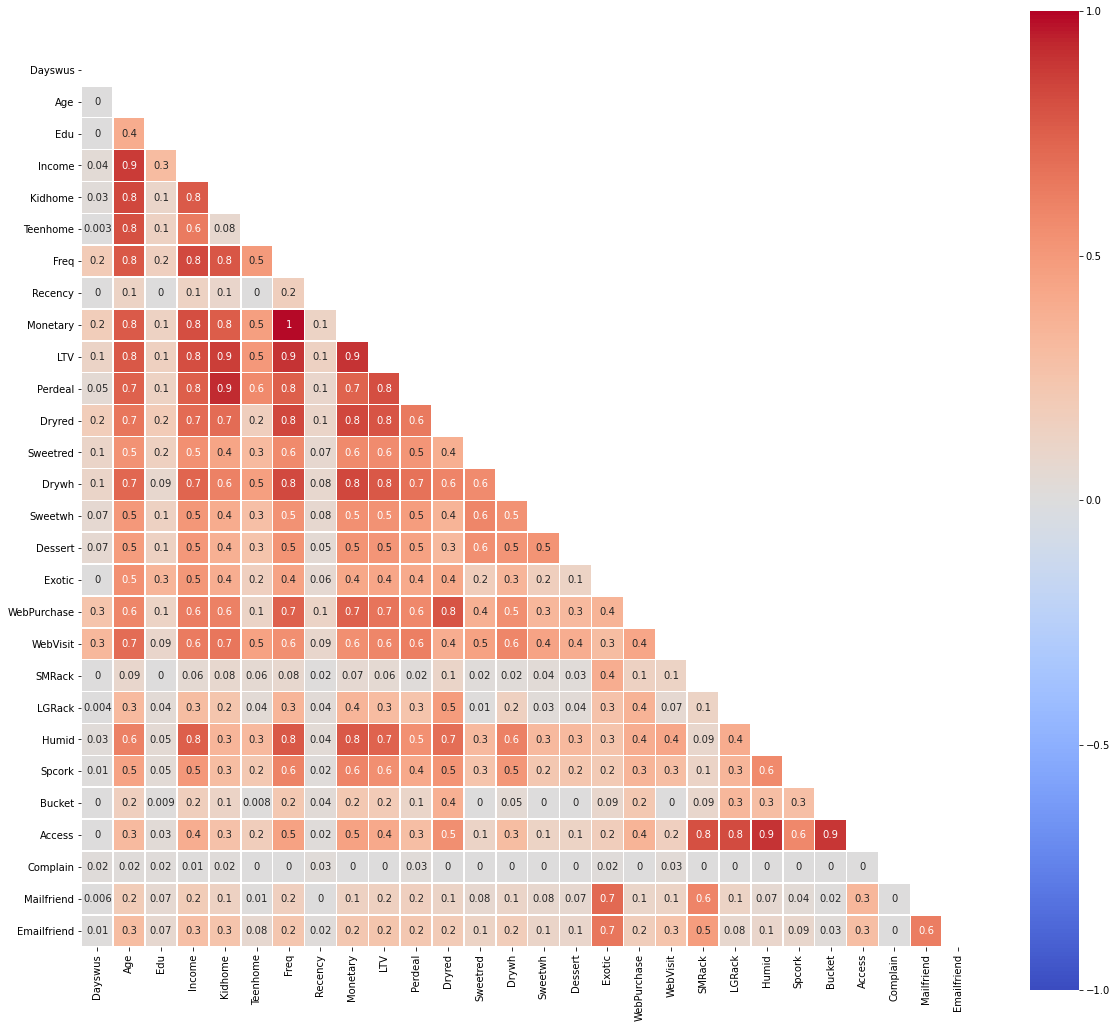

In [13]:
mask = np.zeros_like(phik, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 30)) 
heatmap = sns.heatmap(phik, 
                      square = True,
                      mask = mask,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.1g',
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})
#add the column names as labels
ax.set_yticklabels(phik.columns, rotation = 0)
ax.set_xticklabels(phik.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [14]:
non_metric_features = data.columns[(data.dtypes == 'O')|(data.dtypes == 'int8')].tolist()
metric_features = data.columns.drop(non_metric_features).to_list()

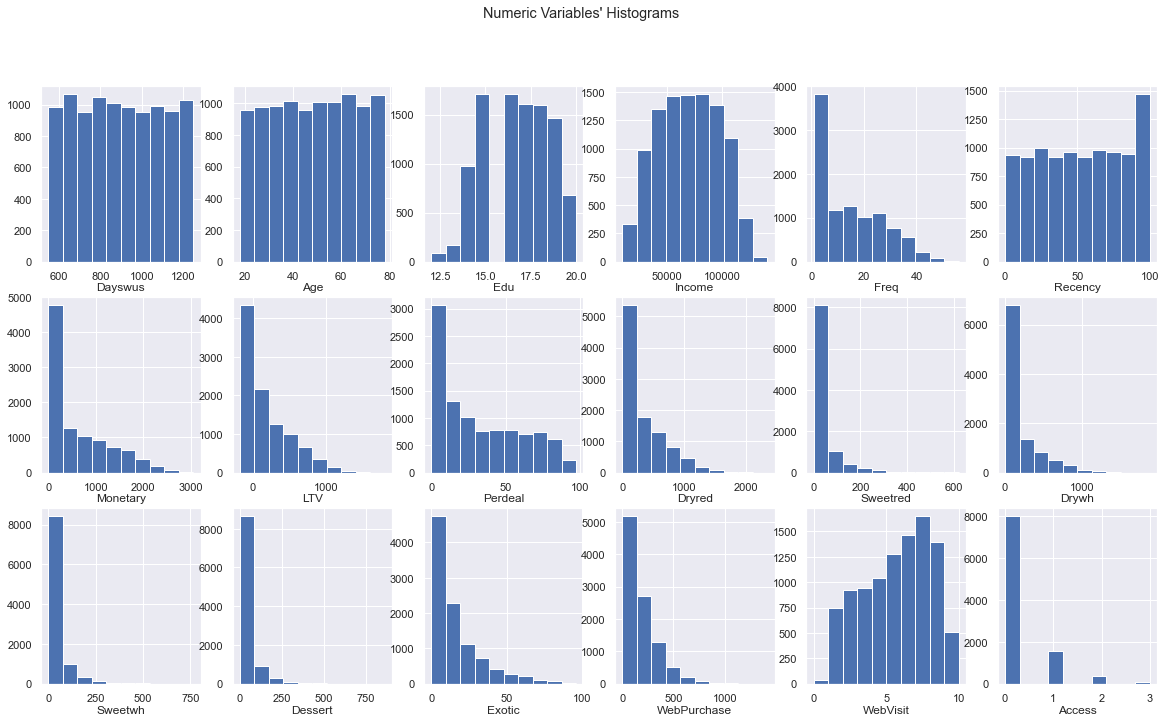

In [15]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.2)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

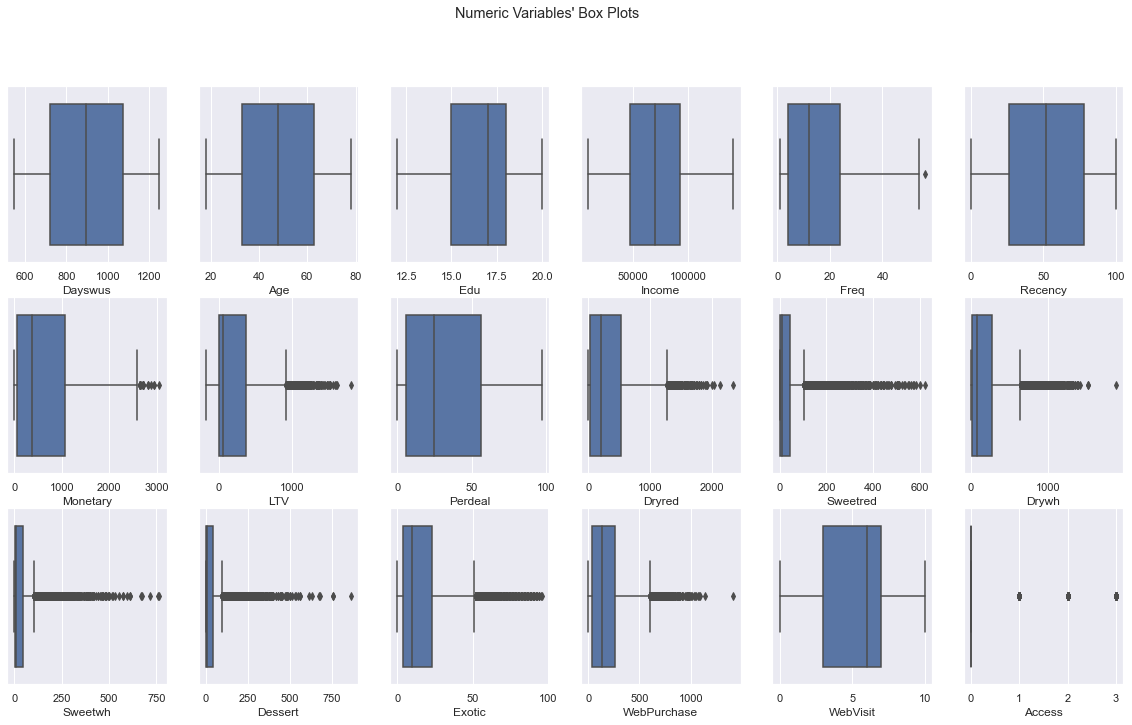

In [16]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

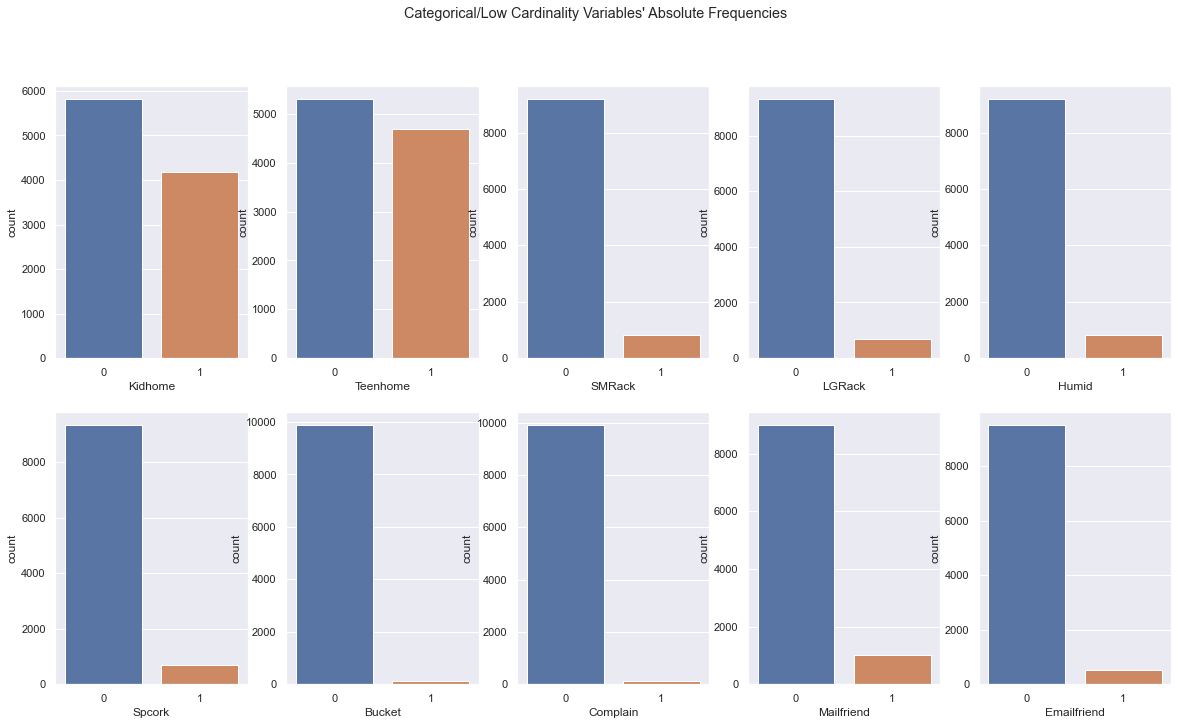

In [17]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(data[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

# **4. Modeling** <a class="anchor" id="4"></a>

## **4.1. Recency, Frequency, Monetary Model** <a class="anchor" id="4.1"></a>

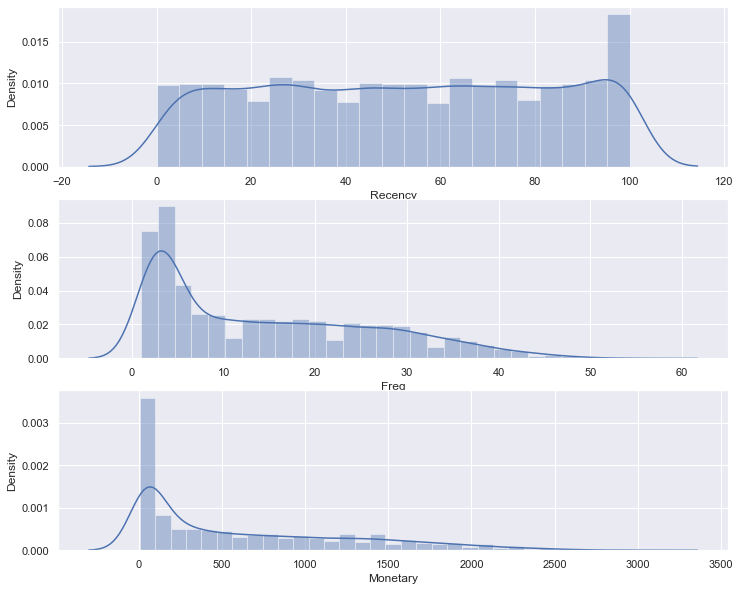

In [18]:
#Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data['Freq'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data['Monetary'])
# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles

In [19]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data['Freq'], q=4, labels=f_labels)
# Create new columns R and F 
data_process = data.assign(R = r_groups.values, F = f_groups.values)
# Create labels for Monetary
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data['Monetary'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)
data_process.head()

Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
Custid                                                                    
5325.0    653.0  55.0  20.0   78473.0        0         0  20.0     18.0   
3956.0   1041.0  75.0  18.0  105087.0        0         0  36.0     33.0   
3681.0    666.0  18.0  12.0   27984.0        1         0   4.0     56.0   
2829.0   1049.0  42.0  16.0   61748.0        1         1   2.0     46.0   
8788.0    837.0  47.0  16.0   65789.0        0         1   2.0      3.0   

        Monetary    LTV  ...  Humid  Spcork  Bucket  Access  Complain  \
Custid                   ...                                            
5325.0     826.0  445.0  ...      0       0       0       0         0   
3956.0    1852.0  539.0  ...      0       1       0       0         0   
3681.0      39.0   -7.0  ...      0       0       0       0         0   
2829.0      37.0   -6.0  ...      0       0       0       0         0   
8788.0      36.0    4.0  ...      0       0       0       0         0   

        Mailfriend  Emailfriend  R  F  M  
Custid                                    
5325.0           0            0  4  3  3  
3956.0           0            0  3  4  4  
3681.0           0            0  2  1  1  
2829.0           1            1  3  1  1  
8788.0           0            0  4  1  1  

[5 rows x 31 columns]

with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below. Let’s assign our dataframe to our newly created rfm dataframe.

In [20]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
Custid                                                                    
5325.0    653.0  55.0  20.0   78473.0        0         0  20.0     18.0   
3956.0   1041.0  75.0  18.0  105087.0        0         0  36.0     33.0   
3681.0    666.0  18.0  12.0   27984.0        1         0   4.0     56.0   
2829.0   1049.0  42.0  16.0   61748.0        1         1   2.0     46.0   
8788.0    837.0  47.0  16.0   65789.0        0         1   2.0      3.0   

        Monetary    LTV  ...  Spcork  Bucket  Access  Complain  Mailfriend  \
Custid                   ...                                                 
5325.0     826.0  445.0  ...       0       0       0         0           0   
3956.0    1852.0  539.0  ...       1       0       0         0           0   
3681.0      39.0   -7.0  ...       0       0       0         0           0   
2829.0      37.0   -6.0  ...       0       0       0         0           1   
8788.0      36.0    4.0  ...       0       0       0         0           0   

        Emailfriend  R  F  M  RFM_Segment_Concat  
Custid                                            
5325.0            0  4  3  3                 433  
3956.0            0  3  4  4                 344  
3681.0            0  2  1  1                 211  
2829.0            1  3  1  1                 311  
8788.0            0  4  1  1                 411  

[5 rows x 32 columns]

In [21]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [22]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

Dayswus   Age   Edu    Income  Kidhome  Teenhome  Freq  Recency  \
Custid                                                                    
5325.0    653.0  55.0  20.0   78473.0        0         0  20.0     18.0   
3956.0   1041.0  75.0  18.0  105087.0        0         0  36.0     33.0   
3681.0    666.0  18.0  12.0   27984.0        1         0   4.0     56.0   
2829.0   1049.0  42.0  16.0   61748.0        1         1   2.0     46.0   
8788.0    837.0  47.0  16.0   65789.0        0         1   2.0      3.0   

        Monetary    LTV  ...  Access  Complain  Mailfriend  Emailfriend  R  F  \
Custid                   ...                                                    
5325.0     826.0  445.0  ...       0         0           0            0  4  3   
3956.0    1852.0  539.0  ...       0         0           0            0  3  4   
3681.0      39.0   -7.0  ...       0         0           0            0  2  1   
2829.0      37.0   -6.0  ...       0         0           1            1  3  1   
8788.0      36.0    4.0  ...       0         0           0            0  4  1   

        M  RFM_Segment_Concat  RFM_Score         RFM_Level  
Custid                                                      
5325.0  3                 433       10.0  Can't Loose Them  
3956.0  4                 344       11.0  Can't Loose Them  
3681.0  1                 211        4.0   Needs Attention  
2829.0  1                 311        5.0         Promising  
8788.0  1                 411        6.0         Potential  

[5 rows x 34 columns]

In [23]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Freq': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency  Freq Monetary      
                      mean  mean     mean count
RFM_Level                                      
Can't Loose Them      42.0  27.2   1297.8  3720
Champions             42.5  13.4    492.2  1199
Loyal                 56.3  11.4    401.7  1209
Needs Attention       72.0   3.0     47.2   654
Potential             40.2   5.1    121.5  1246
Promising             61.4   4.7    105.3  1113
Require Activation    94.8   1.8     26.5   859

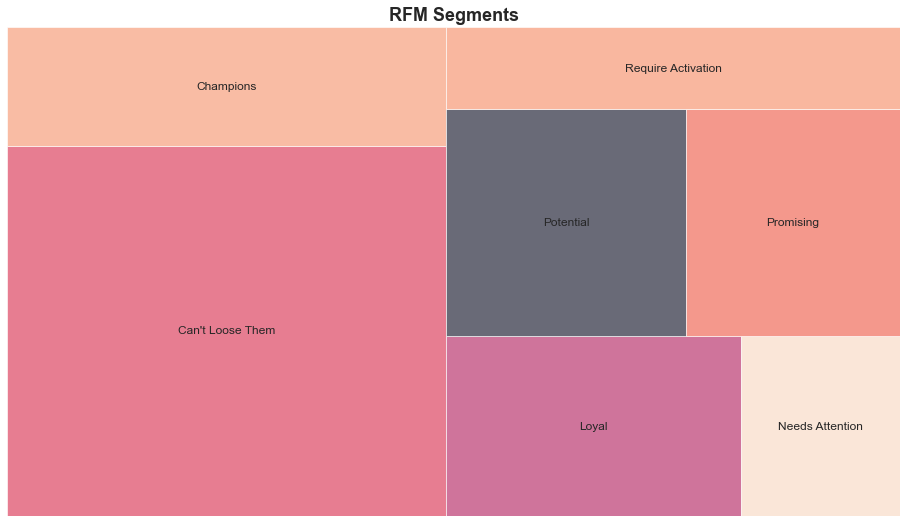

In [24]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FreqMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## **4.2. Clustering by Perspectives** <a class="anchor" id="4.2"></a>

In [25]:
df = data.copy()

In [26]:
# Split variables into perspectives (example, requires critical thinking and domain knowledge)
demographic_features = [
    'Age',
    'Edu',
    'Income',
    'Kidhome', 
    'Teenhome', 
    'Freq',
    'Recency', 
    'Monetary'
]

preference_features = [
    'Perdeal', 
    'Dryred', 
    'Sweetred', 
    'Drywh', 
    'Sweetwh', 
    'Dessert',
    'Exotic', 
    'WebPurchase', 
    'WebVisit', 
    'SMRack', 
    'LGRack', 
    'Humid',
    'Spcork', 
    'Bucket', 
    'Access', 
    'Complain', 
    'Mailfriend', 
    'Emailfriend'
]

data_dem = data[demographic_features].copy()
data_prf = data[preference_features].copy()

In [27]:
def scale_df(df): 
    scaler = MinMaxScaler()
    df_normal = scaler.fit_transform(df)
    df_normal = pd.DataFrame(df_normal, columns=df.columns, index=df.index)
    return df_normal

In [28]:
data_dem = scale_df(data_dem)
data_prf = scale_df(data_prf)

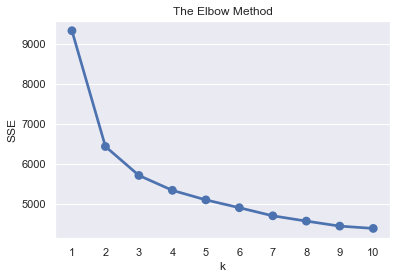

In [29]:
# Fit KPrototypes and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kproto = KPrototypes(n_clusters=k, n_jobs=-1)
    kproto.fit_predict(data_dem, categorical=[2,4,5])
    sse[k] = kproto.cost_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

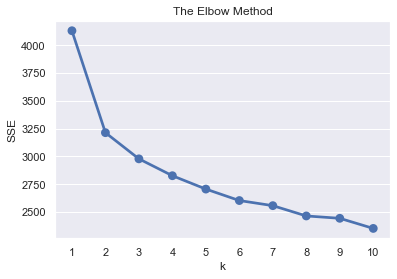

In [30]:
# Fit KPrototypes and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kproto = KPrototypes(n_clusters=k, n_jobs=-1)
    kproto.fit_predict(data_prf, categorical=[7,8,9,10,11,12,13,14,15,16,17])
    sse[k] = kproto.cost_
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [31]:
# clustering 
kproto_dem = KPrototypes(n_jobs = -1, n_clusters = 3)
dem_labels = kproto_dem.fit_predict(data_dem, categorical=[2,4,5])

kproto_pref = KPrototypes(n_jobs = -1, n_clusters = 4)
behavior_labels = kproto_pref.fit_predict(data_prf, categorical=[7,8,9,10,11,12,13,14,15,16,17])

df['dem_labels'] = dem_labels
df['behavior_labels'] = behavior_labels

In [32]:
# Count label frequencies (contigency table)
df.groupby(['dem_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_labels', 'dem_labels', 0)

dem_labels            0       1       2
behavior_labels                        
0                   8.0   440.0   207.0
1                2232.0   103.0   364.0
2                 228.0   821.0  2417.0
3                   NaN  2824.0   356.0

In [33]:
non_metric_features = ["Kidhome", "Teenhome"]
metric_features = data_dem.columns.drop(non_metric_features).to_list()

In [34]:
# Clusters with low frequency to be merged:
to_merge =  [(0,0), (1,1), (2,0), (0,2)]


df_centroids = df.groupby(['behavior_labels', 'dem_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (1, 2), (1, 1): (1, 0), (2, 0): (0, 0), (0, 2): (3, 1)}

In [35]:
df_ = df.copy()

# Changing the behavior_labels and demografic_labels based on source_target
for source, target in source_target.items():
    mask = (df_['behavior_labels']==source[0]) & (df_['dem_labels']==source[1])
    df_.loc[mask, 'behavior_labels'] = target[0]
    df_.loc[mask, 'dem_labels'] = target[1]

# New contigency table
df_.groupby(['dem_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_labels', 'dem_labels', 0)

dem_labels            0       1       2
behavior_labels                        
0                 228.0   440.0     NaN
1                2335.0     NaN   372.0
2                   NaN   821.0  2417.0
3                   NaN  3031.0   356.0

#### Merging using hierarchical 

In [36]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['behavior_labels', 'dem_labels'])\
    [metric_features].mean()
df_centroids

Age        Edu         Income       Freq  \
behavior_labels dem_labels                                                   
0               0           64.625000  16.625000   92548.875000  25.250000   
                1           30.145455  15.925000   44290.125000   5.447727   
                2           36.797101  15.763285   52949.115942   9.154589   
1               0           69.713262  16.974014  103614.108871  31.498656   
                1           66.320388  17.184466  103688.582524  30.262136   
                2           58.626374  16.642857   92562.417582  24.804945   
2               0           61.131579  17.192982   84590.271930  18.605263   
                1           43.204629  17.052375   67534.835566  10.890378   
                2           49.169218  16.913943   71101.535374  13.139015   
3               1           32.938385  16.508144   45911.239731   4.453612   
                2           36.053371  16.443820   44880.050562   5.109551   

                              Recency     Monetary  
behavior_labels dem_labels                          
0               0           27.875000  1179.375000  
                1           55.847727   145.945455  
                2           55.913043   317.043478  
1               0           50.453853  1564.109319  
                1           52.339806  1485.718447  
                2           50.785714  1138.934066  
2               0           49.070175   763.065789  
                1           52.465286   395.526188  
                2           51.029789   491.705420  
3               1           54.213173   103.939093  
                2           52.325843   131.735955

In [37]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [38]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

In [39]:
df_centroids.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (1, 0),
            (1, 1),
            (1, 2),
            (2, 0),
            (2, 1),
            (2, 2),
            (3, 1),
            (3, 2)],
           names=['behavior_labels', 'dem_labels'])

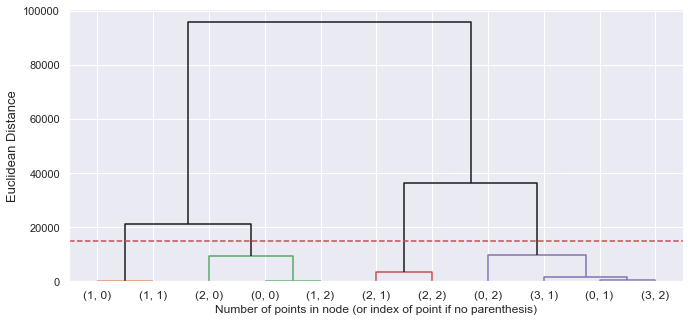

In [40]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 15000
dendrogram(linkage_matrix, labels= df_centroids.index.to_list(), p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
#plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [41]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age        Edu         Income       Freq  \
behavior_labels dem_labels                                                   
0               0           64.625000  16.625000   92548.875000  25.250000   
                1           30.145455  15.925000   44290.125000   5.447727   
                2           36.797101  15.763285   52949.115942   9.154589   
1               0           69.713262  16.974014  103614.108871  31.498656   
                1           66.320388  17.184466  103688.582524  30.262136   
                2           58.626374  16.642857   92562.417582  24.804945   
2               0           61.131579  17.192982   84590.271930  18.605263   
                1           43.204629  17.052375   67534.835566  10.890378   
                2           49.169218  16.913943   71101.535374  13.139015   
3               1           32.938385  16.508144   45911.239731   4.453612   
                2           36.053371  16.443820   44880.050562   5.109551   

                              Recency     Monetary  hclust_labels  
behavior_labels dem_labels                                         
0               0           27.875000  1179.375000              1  
                1           55.847727   145.945455              0  
                2           55.913043   317.043478              0  
1               0           50.453853  1564.109319              3  
                1           52.339806  1485.718447              3  
                2           50.785714  1138.934066              1  
2               0           49.070175   763.065789              1  
                1           52.465286   395.526188              2  
                2           51.029789   491.705420              2  
3               1           54.213173   103.939093              0  
                2           52.325843   131.735955              0

In [42]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['dem_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

Age        Edu         Income       Freq    Recency  \
merged_labels                                                              
0              33.115756  16.394826   46009.605696   4.883198  54.317481   
1              59.658333  16.851667   89532.821667  22.455000  49.828333   
2              47.656887  16.949043   70197.193020  12.568870  51.393762   
3              69.563597  16.983298  103617.394004  31.444111  50.537045   

                  Monetary  
merged_labels               
0               122.881108  
1               996.643333  
2               467.319024  
3              1560.651392

In [43]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['dem_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('behavior_labels', 'dem_labels', 0)

dem_labels           0       1       2
behavior_labels                       
1                  NaN  2335.0     NaN
2                600.0     NaN  3238.0
3                  NaN     NaN  3827.0

In [44]:
# Setting df to have the final product, behavior and merged clusters
df_normal = df_.copy()

### Cluster Analysis

In [88]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels, fontsize = 23, loc='upper left') # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=20)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20, fontsize = 23)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=20)
    
    #plt.subplots_adjust(hspace=0.4, top=0.90)
    #plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.tight_layout()
    plt.title = ''
    plt.show()

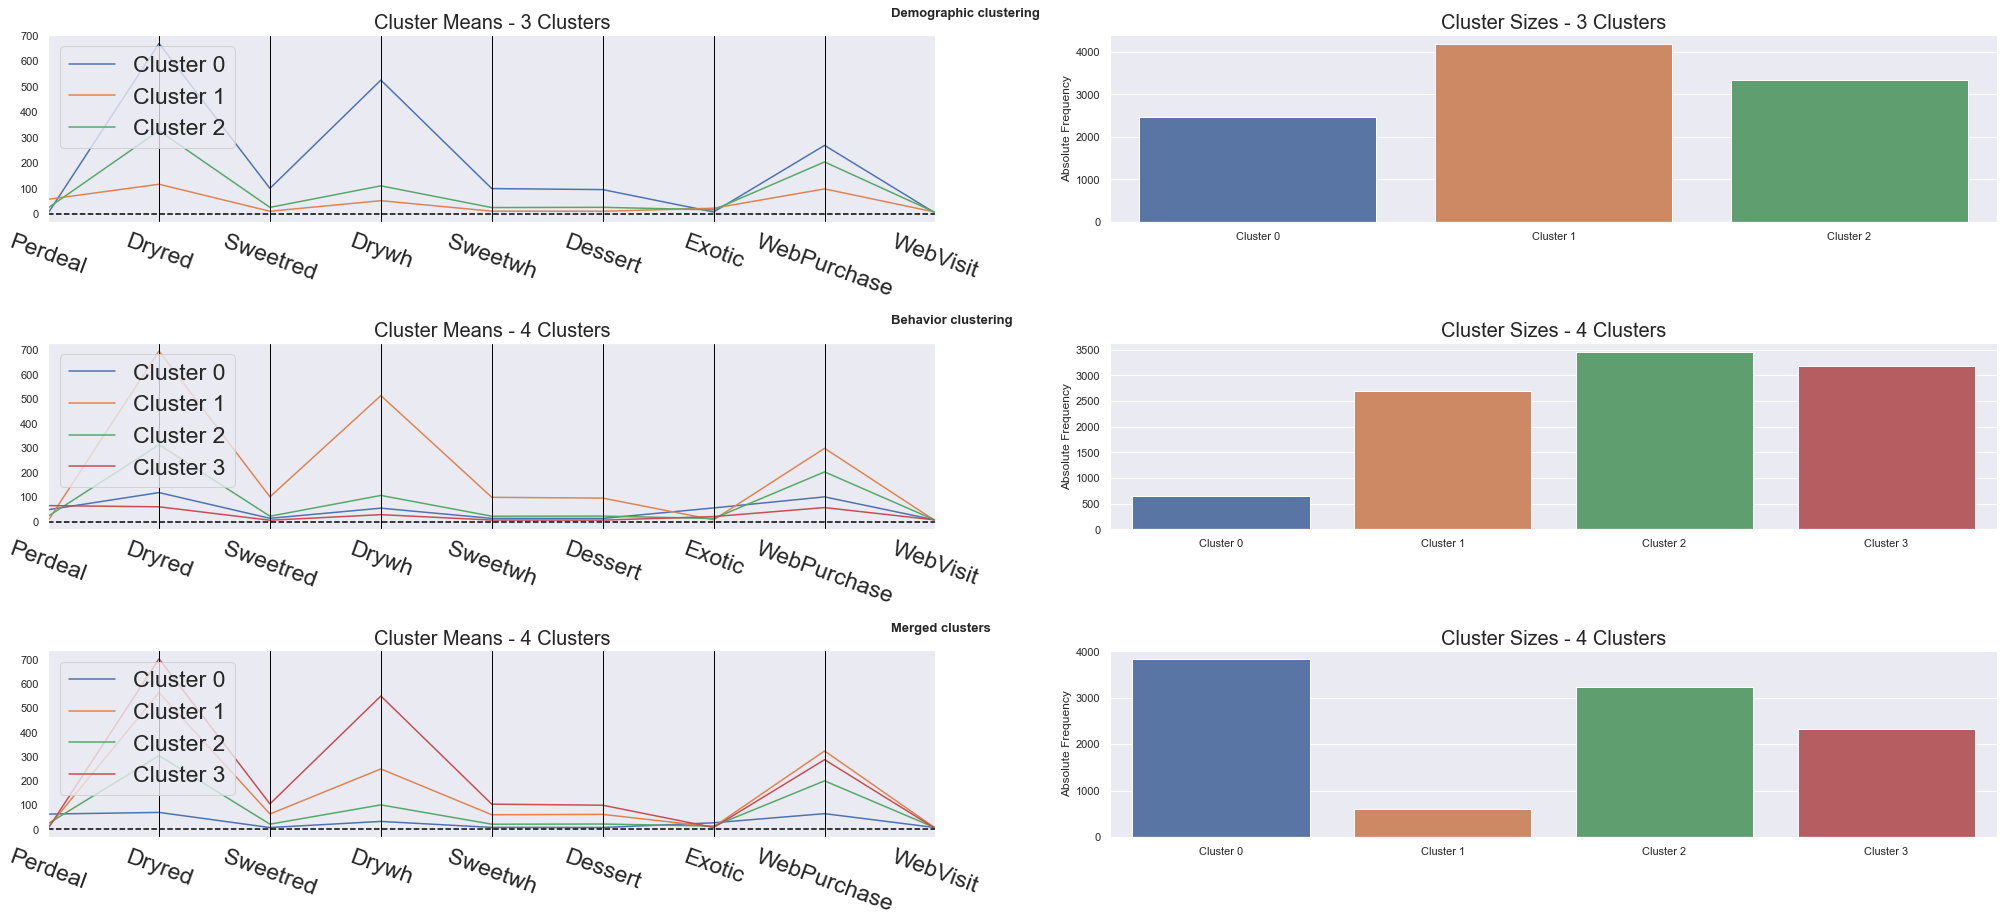

In [89]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_normal[preference_features[:9] + ['dem_labels', 'behavior_labels', 'merged_labels']], 
    label_columns = ['dem_labels', 'behavior_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Behavior clustering", "Merged clusters"]
)

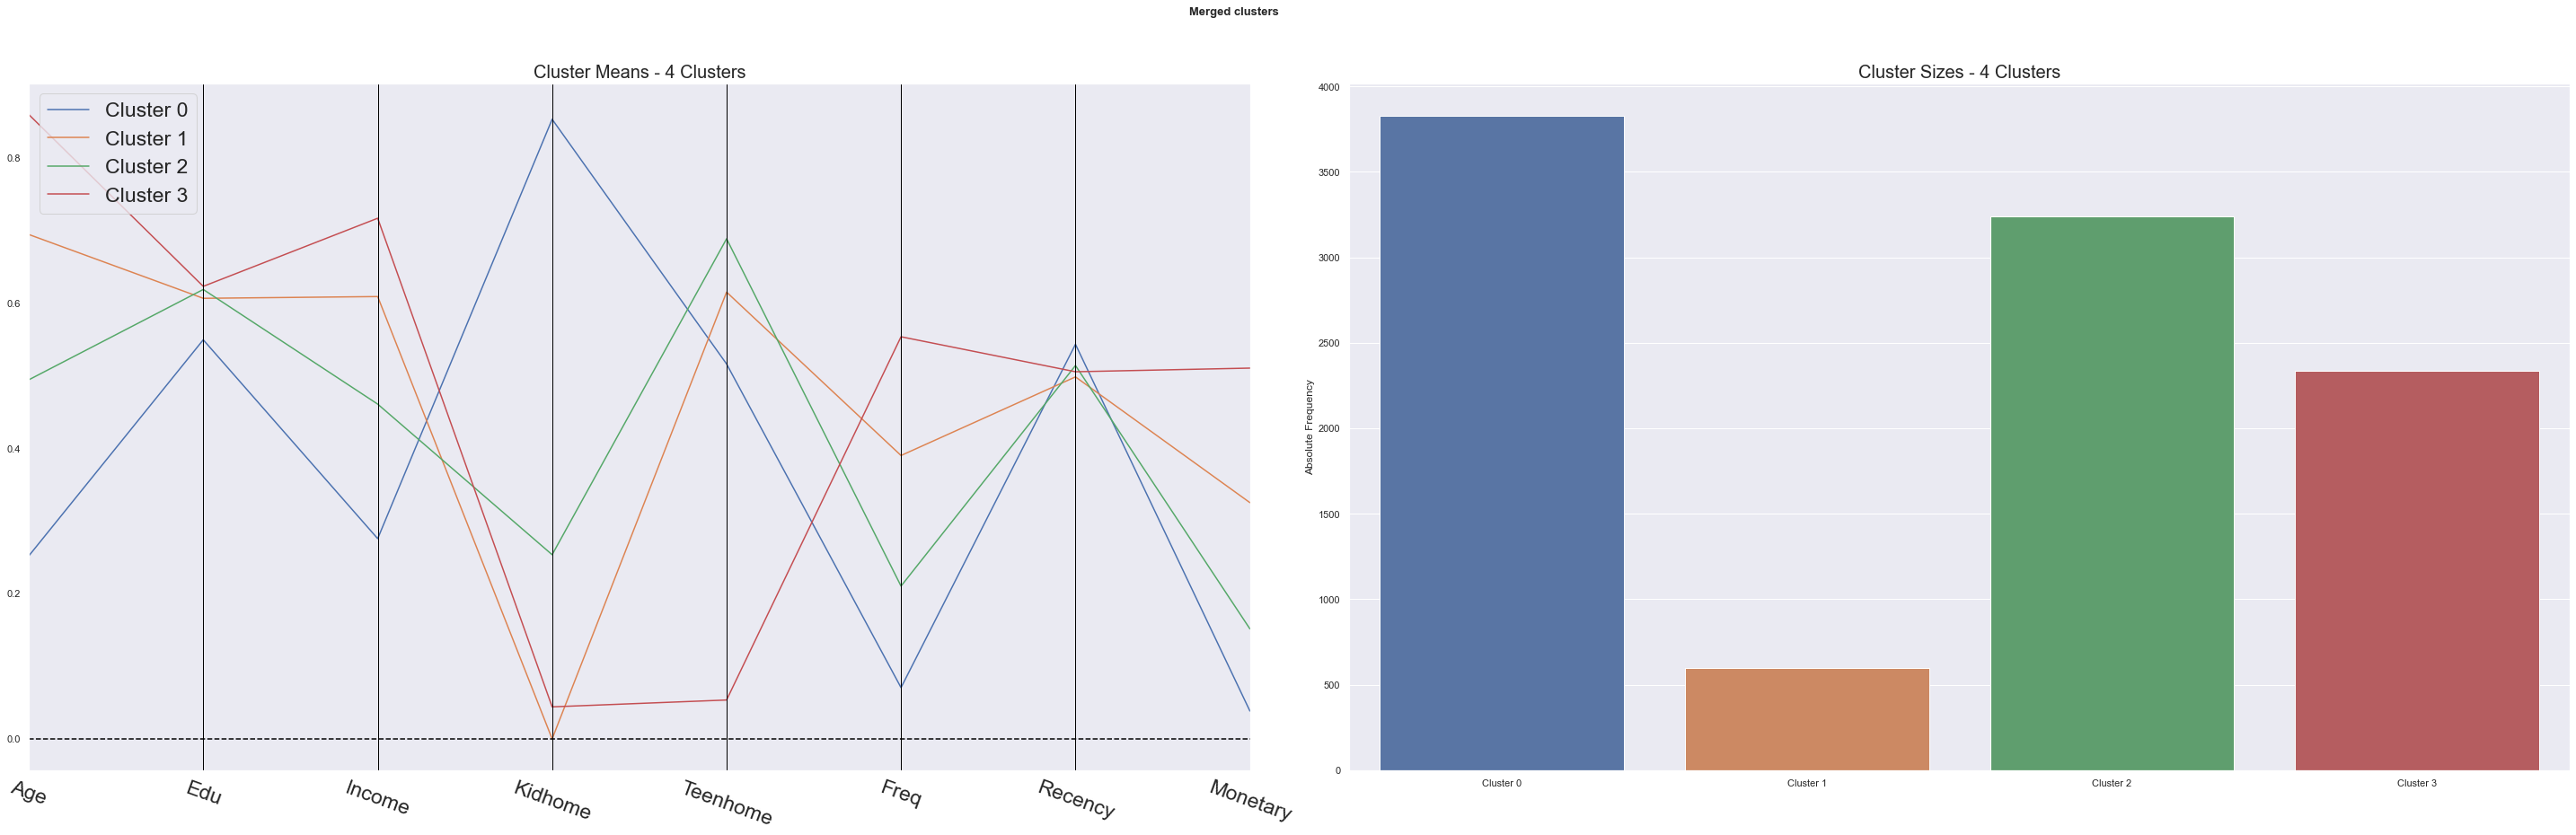

In [90]:
data_dem['merged_labels'] = df_normal['merged_labels']

# Profilling each cluster
cluster_profiles(
    df = data_dem, 
    label_columns = ['merged_labels'], 
    figsize = (40, 13), 
    compar_titles = ["Merged clusters"]
)

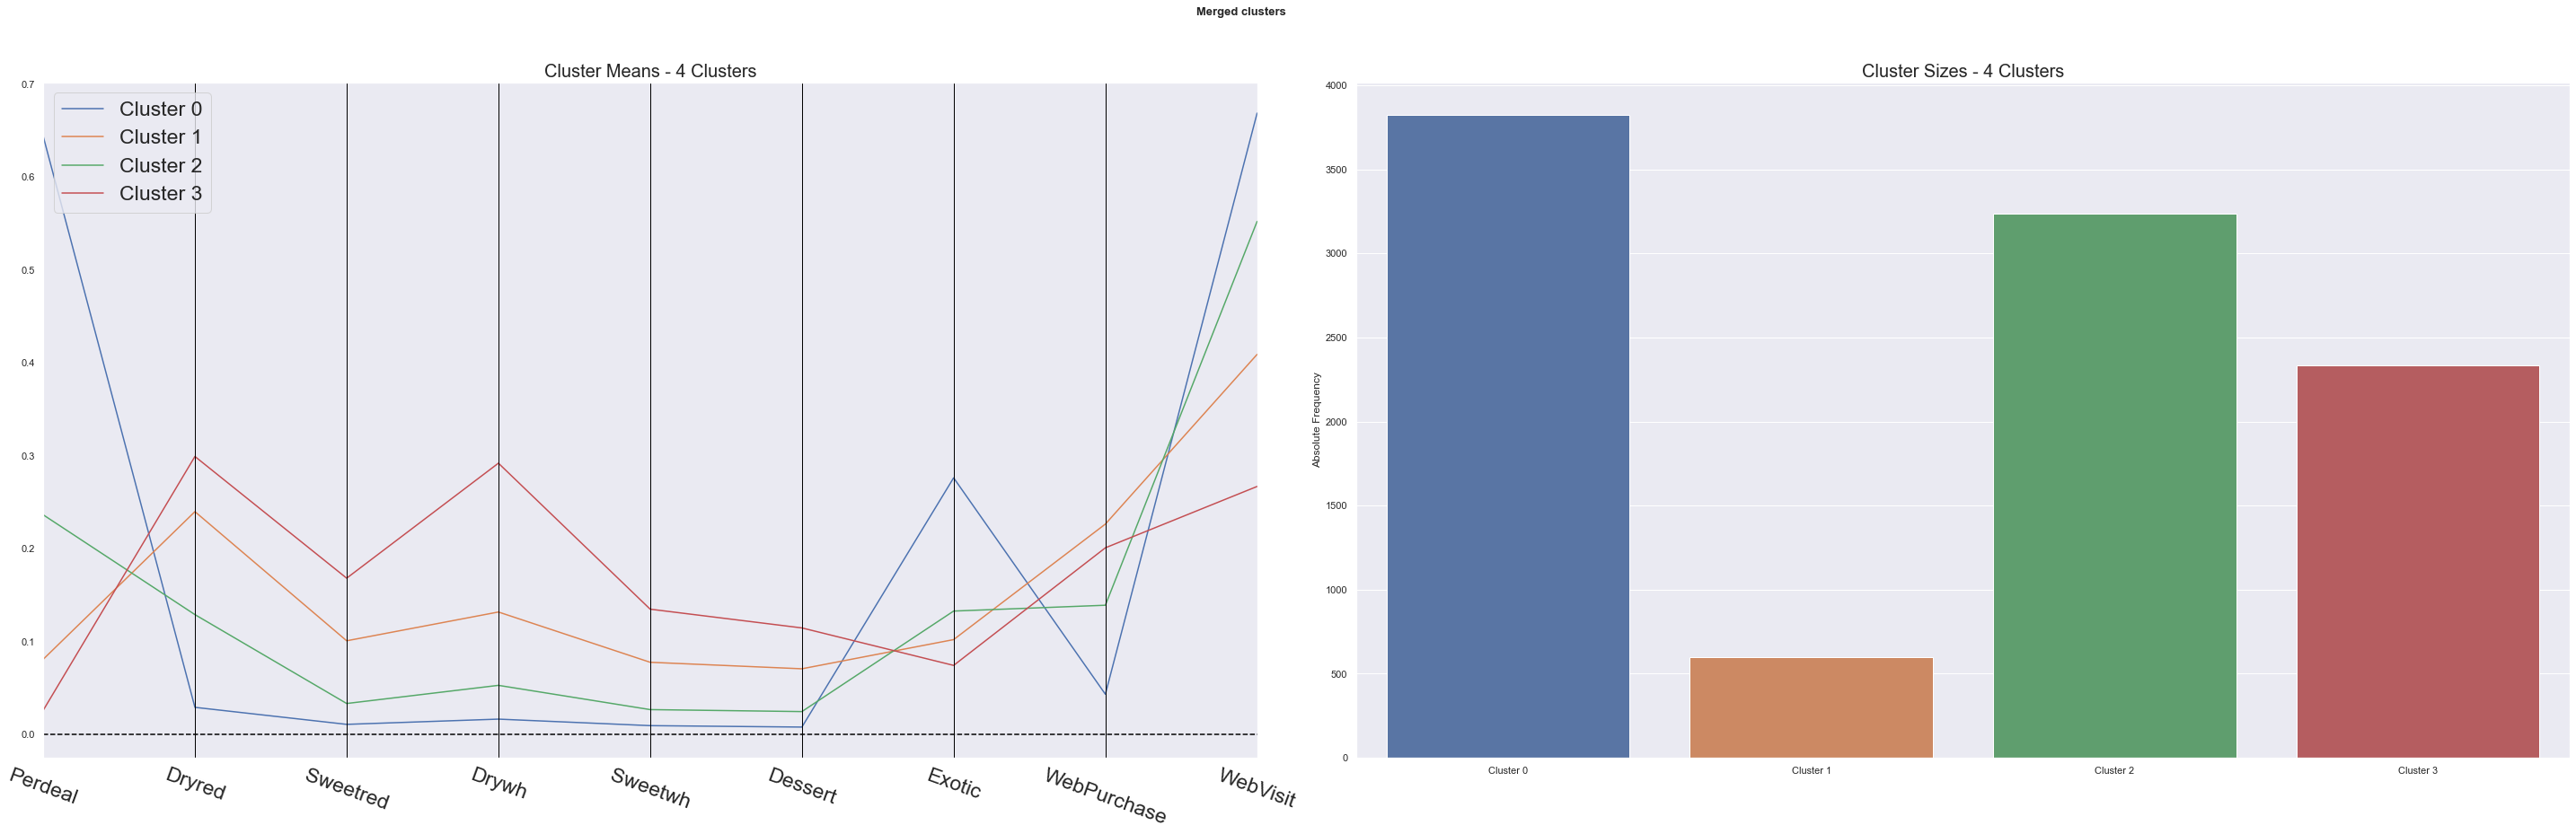

In [91]:
# Profilling each cluster (product, behavior, merged)
df_prf = scale_df(df_normal[preference_features[:9]])

df_prf = df_prf.join(df_normal[['dem_labels', 'behavior_labels', 'merged_labels']])

# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_prf.drop(columns=['dem_labels', 'behavior_labels']), 
    label_columns = ['merged_labels'], 
    figsize = (40, 13), 
    compar_titles = ["Merged clusters"]
)

In [100]:
merged_df = pd.DataFrame()
for i in range(4):
    test = pd.DataFrame(df_normal[df_normal['merged_labels'] == i].mean())
    test = test.T.set_index('merged_labels', drop = True)
    test['size'] = df_normal[df_normal['merged_labels'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.round(2).T

merged_labels         0.0       1.0       2.0        3.0
Dayswus            902.37    899.73    885.62     907.99
Age                 33.12     59.66     47.66      69.56
Edu                 16.39     16.85     16.95      16.98
Income           46009.61  89532.82  70197.19  103617.39
Kidhome              0.85      0.00      0.25       0.04
Teenhome             0.52      0.62      0.69       0.05
Freq                 4.88     22.46     12.57      31.44
Recency             54.32     49.83     51.39      50.54
Monetary           122.88    996.64    467.32    1560.65
LTV                 -2.61    357.84    120.12     641.13
Perdeal             62.46      7.87     22.95       2.54
Dryred              69.30    564.09    303.74     703.57
Sweetred             6.89     62.73     20.83     104.56
Drywh               32.15    248.79    100.46     549.75
Sweetwh              7.44     59.64     20.65     103.39
Dessert              7.06     61.19     21.44      99.13
Exotic              26.53      9.82     12.77       7.16
WebPurchase         64.24    323.01    199.58     286.93
WebVisit             6.69      4.09      5.52       2.67
SMRack               0.13      0.08      0.03       0.07
LGRack               0.01      0.12      0.08       0.13
Humid                0.00      0.07      0.01       0.32
Spcork               0.00      0.06      0.02       0.24
Bucket               0.00      0.03      0.01       0.03
Access               0.14      0.29      0.14       0.55
Complain             0.01      0.01      0.01       0.01
Mailfriend           0.19      0.06      0.05       0.05
Emailfriend          0.12      0.00      0.01       0.00
dem_labels           1.15      1.21      1.75       0.04
behavior_labels      2.49      1.37      2.00       1.00
size              3827.00    600.00   3238.00    2335.00

### Leverage

In [49]:
d = {}
d['total_value_rel'] = df_normal.groupby('merged_labels')['Monetary'].sum()/df_normal['Monetary'].sum()
d['size_rel'] = df_normal.groupby('merged_labels')['Monetary'].count()/df_normal.shape[0]
leverage_df = pd.DataFrame.from_dict(d)

In [50]:
leverage_df['leverage'] = round(leverage_df['total_value_rel'] / leverage_df['size_rel'], 2)
leverage_df.reset_index(inplace=True)

In [51]:
def build_leverage_plotdata(leverage_df, cl_name): 

    # bars
    lev_plotdata = leverage_df[[cl_name, 'total_value_rel', 'size_rel']].melt(id_vars=cl_name)
    lev_plotdata[cl_name] = lev_plotdata[cl_name].astype(str)

    # text annotations
    max_val_per_cl = leverage_df[['total_value_rel', 'size_rel']].max(1)
    dist = max_val_per_cl.max() * 0.05
    y_coord = max_val_per_cl + dist
    y_coord_df = y_coord.reset_index(name='y_coord')
    y_coord_df.rename(columns={'index':cl_name}, inplace=True)

    lev_text = leverage_df[[cl_name, 'leverage']]
    #lev_text.loc[:,'y_coord'] = y_coord
    lev_text = lev_text.merge(y_coord_df, on=cl_name)
    lev_text

    return lev_plotdata, lev_text

def plot_leverage(lev_plotdata, lev_text, cl_name, plot_name): 

    g = sns.barplot(data=lev_plotdata, x = cl_name, y='value', hue='variable')

    for _, (x,s,y) in lev_text.iterrows():
        plt.text(x=x,y=y, s=s, horizontalalignment='center')

    g.set_ylim(top=g.get_ylim()[1]*1.1)

    plt.tight_layout()
    #print(g.get_ylim())
    #plt.savefig(os.path.join(explorations_data_path, f'leverage_{plot_name}.jpeg'), dpi=200)
    plt.show()

def build_plot_leverage(df, cl_name, plot_name): 
    #leverage_df = build_leverage_df(df, cl_name)
    lev_plotdata, lev_text = build_leverage_plotdata(leverage_df, cl_name)
    plot_leverage(lev_plotdata, lev_text, cl_name, plot_name)
    return leverage_df

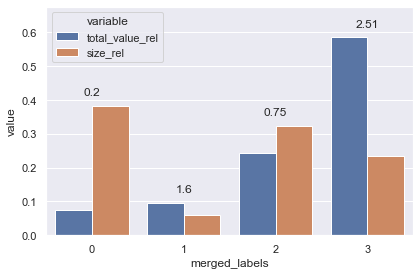

merged_labels  total_value_rel  size_rel  leverage
0              0         0.075538    0.3827      0.20
1              1         0.096053    0.0600      1.60
2              2         0.243059    0.3238      0.75
3              3         0.585349    0.2335      2.51

In [52]:
leverage_df = build_plot_leverage(
    df=leverage_df, 
    cl_name='merged_labels', 
    plot_name='merged'
)

leverage_df

# **5. Evaluation** <a class="anchor" id="5"></a>

In [53]:
#Setting the objects to category 
lgbm_data = data_dem.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')

#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, lgbm_data, dem_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_km)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.9963996411459679


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


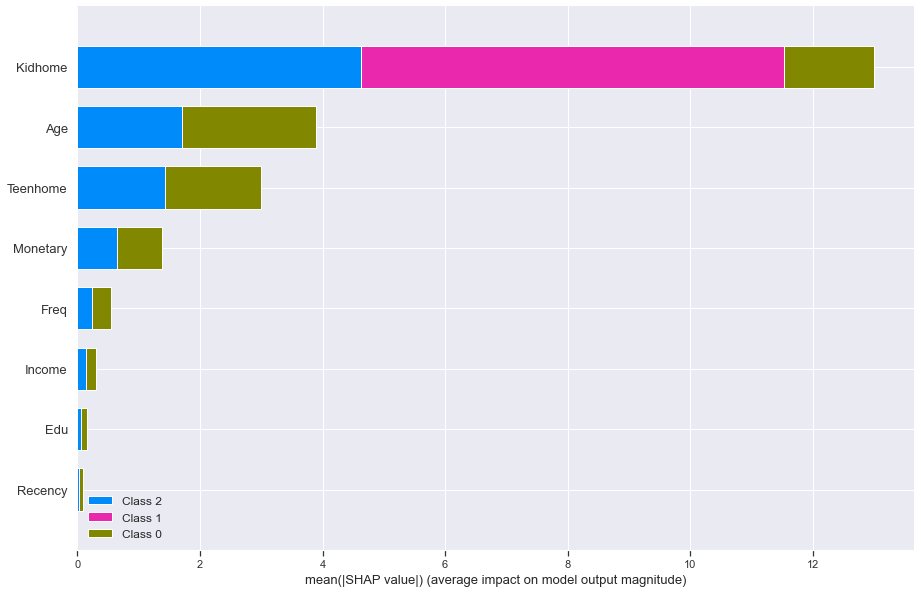

In [54]:
#Fit the model
clf_km.fit(lgbm_data, dem_labels)

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(lgbm_data)
shap.summary_plot(shap_values_km, lgbm_data, plot_type="bar", plot_size=(15, 10))

In [55]:
#Setting the objects to category 
lgbm_data = data_prf.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')

#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, lgbm_data, behavior_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_km)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.9718674369996794


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


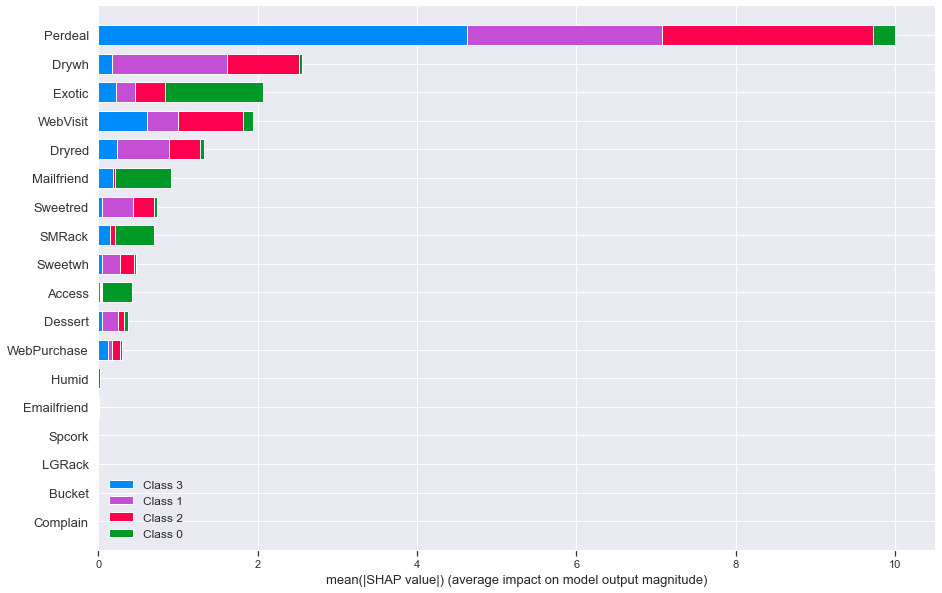

In [56]:
#Fit the model
clf_km.fit(lgbm_data, behavior_labels)

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(lgbm_data)
shap.summary_plot(shap_values_km, lgbm_data, plot_type="bar", plot_size=(15, 10))

# **6. Deployment** <a class="anchor" id="6"></a>

This project identified 4 distinctive clusters of WWW’s customers based on their demographic data; wine and related item preferences; and spending history. Currently, the lack of clustering inhibits the company from adopting more focused marketing strategies for different customers. Group-AA believes these four clusters information will help WWW to better understand its consumer base, particularly for the marketing purposes. However, without a proper deployment strategy, unforeseen anomaly may occur. For the optimal integration we believe the following seven steps are required: 
1.	Starting with these 10,000 customer data, check if our findings in the consumer behavior pattern still holds when compared against the entire database. In case of a computational power limitation, we can randomly sample multiple times and test against them. 
3.	Implement a trigger based on our clustering into the database. This will avoid the need to develop an end-user application. 
3.	New customers will be placed into different segments depending on their demographic information and temporarily be placed into one of the four clusters we’ve defined. 
4.	Over time, their behavioral pattern data can be collected, which will be used to adjust their membership in the cluster. 
5.	We recommend re-clustering of the customers every 6 to 12 months to evaluate whether the consumer behavior still follows our findings in this project. 
6.	In case of a significant divergence, customer relationship management strategy, as well as the marketing strategy will need to be reviewed. 
7.	Further training of employees, especially the ones responsible for customer relationship management. Importance of correct data entry must be highlighted. 
